In [6]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

#hide warnings
import warnings
warnings.filterwarnings("ignore")

## Statistical Testing

### Load Dataset

In [9]:
filename = '2023_6_14_23_20_07_addiction.csv'
title = filename.split('_')[-1].split('.')[0]
print(title.capitalize())

Addiction


In [2]:
df_rewards = pd.read_csv(filename)

In [5]:
df_rewards.index

RangeIndex(start=0, stop=28808, step=1)

### Plot Mean Reward

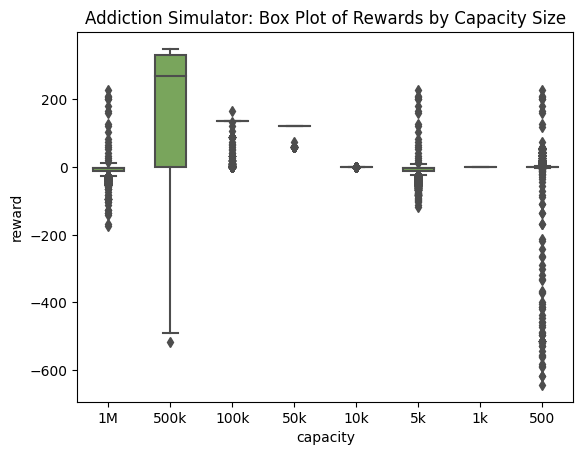

In [10]:
ax = sns.boxplot(x='capacity', y='reward', data=df_rewards, color='#77B150', width=0.5).set(title=title.capitalize() + ' Simulator: Box Plot of Rewards by Capacity Size')
plt.show()

## Shapiro-Wilk test

In [7]:
# The Shapiro-Wilk test, tests the null hypothesis that the data was drawn from a normal distribution this is an ANOVA assumption
shapiro_test = stats.shapiro(df_rewards.reward.values) #(p 5%)
print(shapiro_test)
print(shapiro_test.statistic)
print(shapiro_test.pvalue) #reject if less than 0.05

ShapiroResult(statistic=0.7308021187782288, pvalue=0.0)
0.7308021187782288
0.0


## Kruskal-Wallis test

In [ ]:
# Group the data by capacity
grouped_data = df_rewards.groupby('capacity')['reward']

# Create a list to store the data for each group
groups = []

# Iterate over the groups and extract the corresponding data
for group, data in grouped_data:
    groups.append(data)

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(*groups)

# Print the test statistic and p-value
print("Kruskal-Wallis Test Statistic:", statistic)
print("p-value:", p_value)

## Post Hoc Test: Dunn's test

In [ ]:
# Perform Dunn's test
result = sp.posthoc_dunn(df_rewards, val_col='reward', group_col='capacity')

# Print the pairwise comparison results
print(result)

table shows pair wise results for different capacity groups:
* 1.0 indicates no significant difference and no evidence to reject the null hypothesis
* 0.0 indicate significant difference and to reject the null hypothesis.
* For values between 0 and 1, smaller values indicate stronger evidence against the null hypothesis and a higher likelihood of a true difference between the groups.